In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import subprocess
from pandas import DataFrame
from scipy.stats import uniform
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import glob
import pathlib
from scipy import stats

plt.rcParams['pdf.fonttype']=42

In [2]:
_type = 'Hypo'

In [3]:
_dir = '500_result'

## load

In [4]:
# command = f"hicluster cpg-ratio \
# --fasta_path /home/hanliu/ref/mouse/genome/fasta/with_chrl/mm10_with_chrl.fa \
# --hdf_output_path cpg_ratio_500.hdf \
# --chrom_size_path /home/hanliu/ref/mouse/genome/mm10.main.nochrM.nochrY.chrom.sizes \
# --resolution 500"
# import subprocess
# subprocess.run(command, shell =  True)

In [5]:
df = pd.read_csv(f'{_dir}/{_type}.DMS.concat.sum.bed', sep = '\t', header= None)
df.columns = ['chrom','start','end',f'Total Sig. {_type} DMS Number']
df = df[df['chrom'] != 'chrY']
df['chrom'].unique()

array(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr3', 'chr4', 'chr5',
       'chr6', 'chr7', 'chr8', 'chr9', 'chrX'], dtype=object)

In [6]:
cpg_ratio = pd.read_hdf('cpg_ratio_500.hdf')

In [7]:
merge_df = pd.merge(cpg_ratio, df, on=['chrom', 'start', 'end']).dropna()
merge_df.head()

,chrom,start,end,cpg_ratio,Total Sig. Hypo DMS Number
0,chr1,0,500,0.0,0
1,chr1,500,1000,0.0,0
2,chr1,1000,1500,0.0,0
3,chr1,1500,2000,0.0,0
4,chr1,2000,2500,0.0,0


## check correlation

In [8]:
x = merge_df['cpg_ratio']
y = merge_df['Total Sig. Hypo DMS Number']
stats.pearsonr(x, y)

(0.1388595754525039, 0.0)

In [9]:
hotspot_merge_df=merge_df[merge_df['Total Sig. Hypo DMS Number'] >= 10]
x = hotspot_merge_df['cpg_ratio']
y = hotspot_merge_df['Total Sig. Hypo DMS Number']
stats.pearsonr(x, y)

(0.12213188719119206, 3.603942265687538e-13)

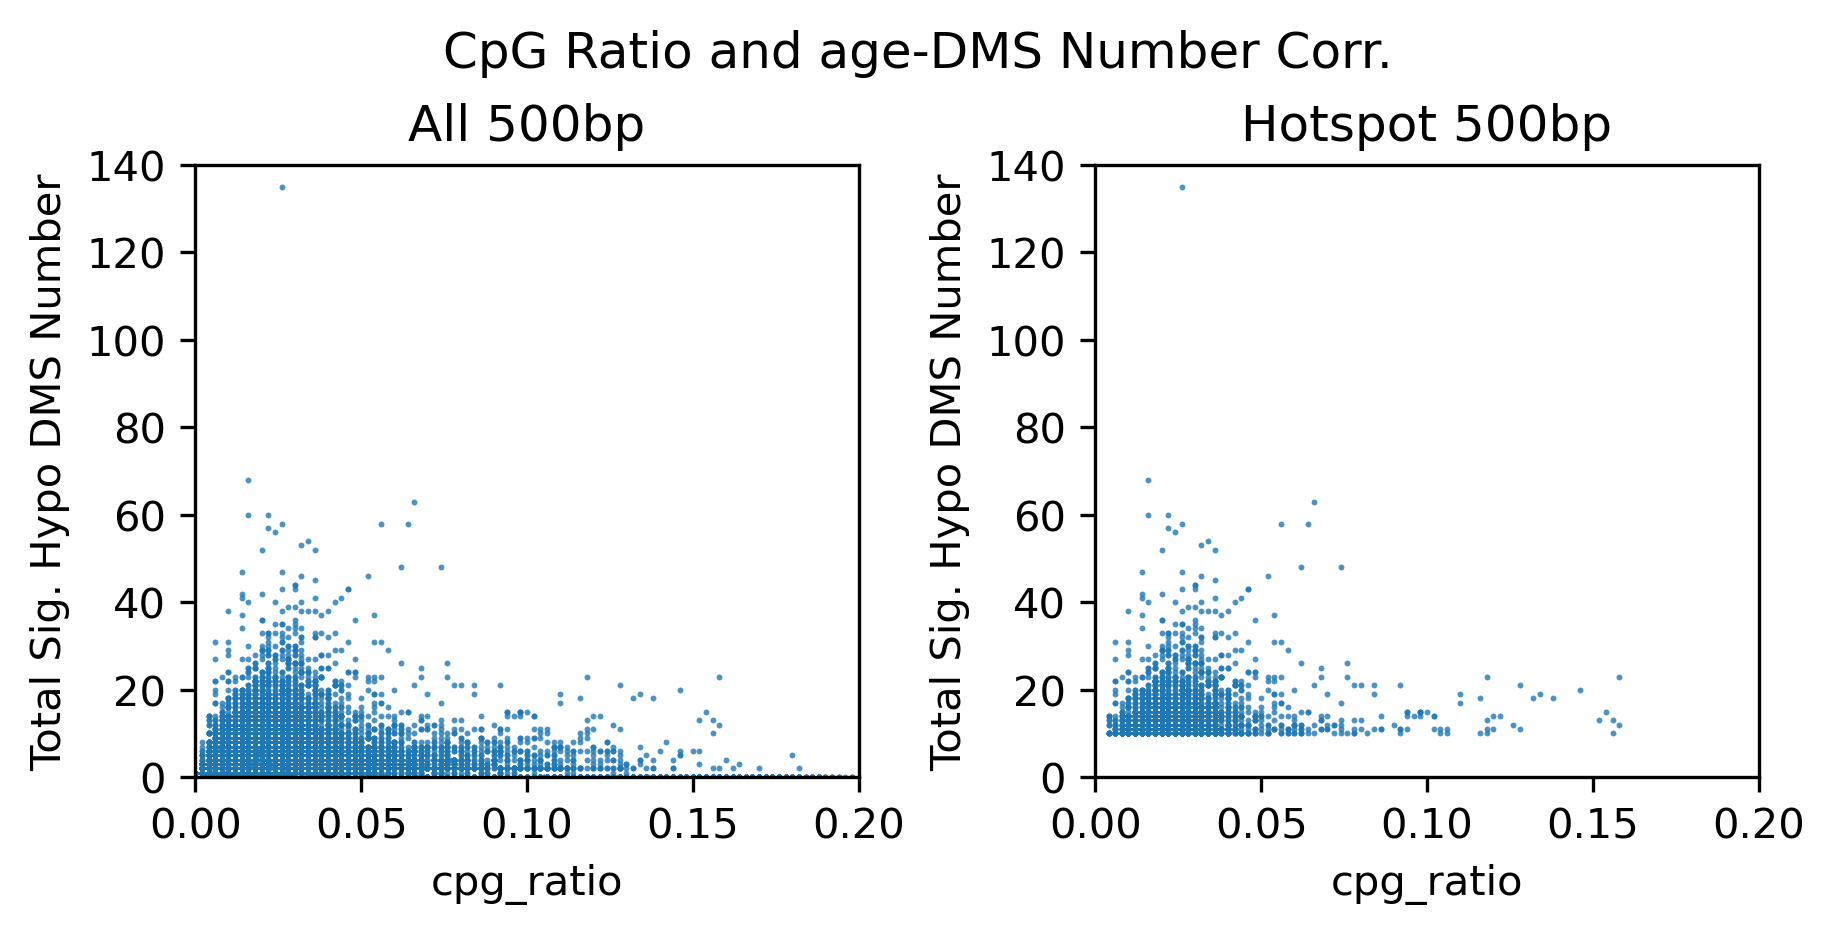

In [11]:
fig, axes = plt.subplots(figsize = (6,3), dpi = 300, ncols = 2, constrained_layout = True)

ax = axes[0]
sns.scatterplot(data = merge_df,
                x = 'cpg_ratio',
                y = 'Total Sig. Hypo DMS Number',
                s = 2, linewidth =0, ax = ax, alpha = 0.8, rasterized = True)
ax.set_title('All 500bp')
ax.set(xlim = (0,0.2), ylim = (0, 140))

ax = axes[1]
sns.scatterplot(data = hotspot_merge_df,
                x = 'cpg_ratio',
                y = 'Total Sig. Hypo DMS Number',
                s = 2, linewidth =0, ax = ax, alpha = 0.8, rasterized = True)
ax.set_title('Hotspot 500bp')
ax.set(xlim = (0,0.2), ylim = (0, 140))
plt.suptitle('CpG Ratio and age-DMS Number Corr.')
fig.savefig(f"figure/corr_cpg_ratio_dms_number.pdf", bbox_inches = 'tight')

## plot normed number

In [10]:
merge_df = merge_df[merge_df['cpg_ratio'] != 0]
merge_df['norm_dms_number'] = merge_df['Total Sig. Hypo DMS Number'] / (500 * merge_df['cpg_ratio'])
merge_df = merge_df.dropna()
merge_df.head()

,chrom,start,end,cpg_ratio,Total Sig. Hypo DMS Number,norm_dms_number
6001,chr1,3000500,3001000,0.002000,0,0.0
6002,chr1,3001000,3001500,0.006000,0,0.0
6003,chr1,3001500,3002000,0.002000,0,0.0
6006,chr1,3003000,3003500,0.007853,0,0.0
6007,chr1,3003500,3004000,0.010000,0,0.0


<AxesSubplot:xlabel='Total Sig. Hypo DMS Number', ylabel='norm_dms_number'>

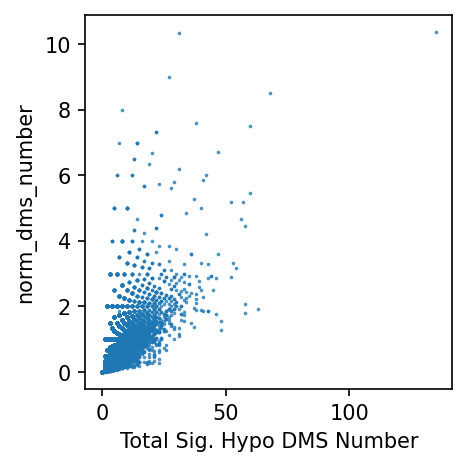

In [25]:
fig, ax = plt.subplots(figsize = (3,3), dpi = 150,  constrained_layout = True)

sns.scatterplot(data = merge_df,
                x = 'Total Sig. Hypo DMS Number',
                y = 'norm_dms_number',
                s = 3, linewidth =0, 
                ax = ax, alpha = 0.8, rasterized = True)
# ax.set(xlim = (0,0.2), ylim = (0, 140))

In [26]:
x = merge_df['Total Sig. Hypo DMS Number']
y = merge_df['norm_dms_number']
stats.pearsonr(x, y)

(0.812316104768132, 0.0)

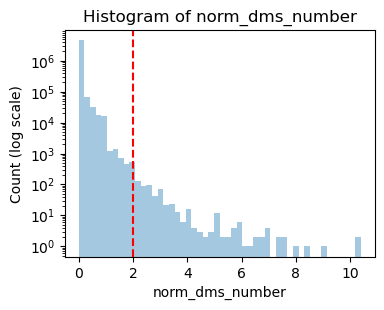

In [18]:
fig, ax = plt.subplots(figsize = (4,3), dpi = 100)
sns.distplot(merge_df['norm_dms_number'], ax =ax, kde=False, hist_kws={"log": True})
plt.ylabel("Count (log scale)")
plt.title(f"Histogram of norm_dms_number")
#ax.set_xticks([0, 10, 30,50, 70, 90])
ax.axvline(x = 2, ls = '--', lw = 1.5, c = 'r')
#fig.savefig(f'figure/{_type}.hotspot.distribution.pdf', bbox_tight = 'True')